1- Building Data Pipeline

In [ ]:
! pip install tensorflow opencv-python matplotlib

In [3]:
! pip list

Package                      Version
---------------------------- ------------
absl-py                      2.0.0
asttokens                    2.4.1
astunparse                   1.6.3
attrs                        23.1.0
cachetools                   5.3.2
certifi                      2023.7.22
cffi                         1.16.0
charset-normalizer           3.3.2
click                        8.1.7
colorama                     0.4.6
comm                         0.2.0
contourpy                    1.2.0
cycler                       0.12.1
debugpy                      1.8.0
decorator                    5.1.1
dlib                         19.24.2
dnspython                    2.4.2
executing                    2.0.1
face-recognition             1.3.0
face-recognition-models      0.3.0
flatbuffers                  23.5.26
fonttools                    4.44.3
gast                         0.5.4
google-auth                  2.23.4
google-auth-oauthlib         1.1.0
google-pasta                 0.2.


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import tensorflow as tf

# to navigate through file structure and deals with the os (ignoring the importing data problems)
import os

In [2]:
os.path.join('data','happy') # example not necessary in the code


'data\\happy'

In [3]:
# if you load any package as tensor flow it expands to many files so it prevents that and somethimg called oom error or memory error
gpus= tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

In [4]:
import cv2
import imghdr

C:\Users\Marwan Ali\AppData\Local\Temp\ipykernel_5976\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [8]:
data_dir = 'data'

In [9]:
image_exts = ['jpeg','jpg', 'bmp', 'png']


In [10]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list data\happy\427394C200000578-0-image-a-24_1500384481554.jpg
Image not in ext list data\happy\how-to-watch-shiny-happy-people-64a2f8ea7dc3014582658-900.webp
Image not in ext list data\happy\vector.svg
Image not in ext list data\happy\vector10.svg
Image not in ext list data\happy\vector11.svg
Image not in ext list data\happy\vector12.svg
Image not in ext list data\happy\vector13.svg
Image not in ext list data\happy\vector14.svg
Image not in ext list data\happy\vector2.svg
Image not in ext list data\happy\vector3.svg
Image not in ext list data\happy\vector4.svg
Image not in ext list data\happy\vector5.svg
Image not in ext list data\happy\vector6.svg
Image not in ext list data\happy\vector7.svg
Image not in ext list data\happy\vector8.svg
Image not in ext list data\happy\vector9.svg
Image not in ext list data\sad\depositphotos_19568511-stock-photo-teenage-girl-looking-thoughtful-about.jpg
Image not in ext list data\sad\depositphotos_210655610-stock-photo-sad-man-sittin

In [11]:
import numpy as np
from matplotlib import pyplot as plt

In [13]:
data = tf.keras.utils.image_dataset_from_directory('data')
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()


Found 313 files belonging to 2 classes.


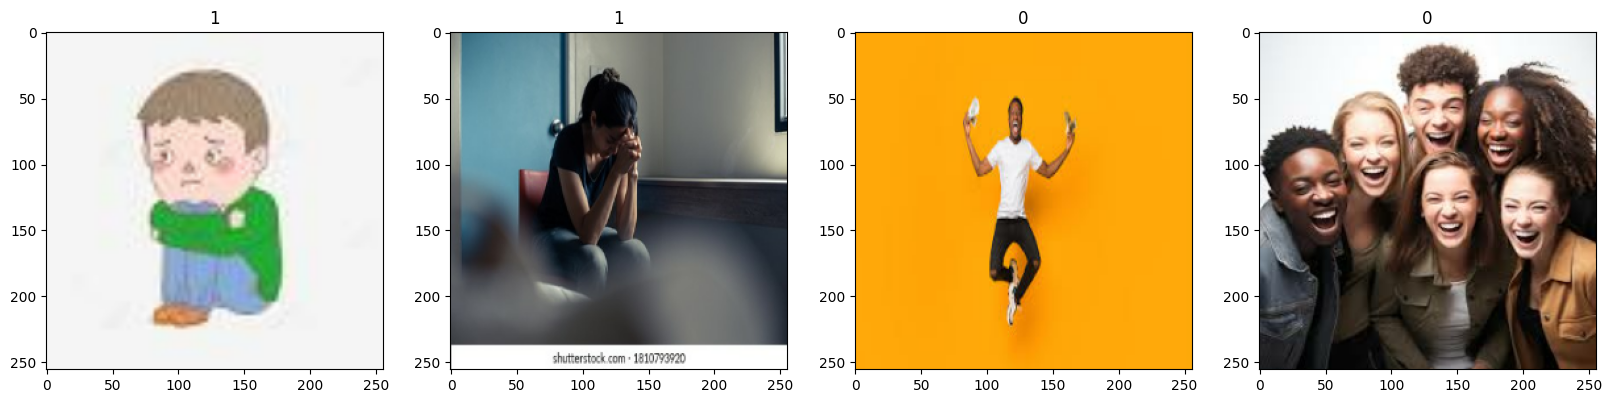

In [14]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

2- Preprocessing Data

In [15]:
data = data.map(lambda x,y: (x / 255, y))

In [21]:
data.as_numpy_iterator().next()

(array([[[[9.53416049e-01, 8.91620696e-01, 5.88112772e-01],
          [9.58287358e-01, 9.07659292e-01, 6.37055755e-01],
          [9.63158727e-01, 9.27144587e-01, 7.19623148e-01],
          ...,
          [8.66666675e-01, 6.10723019e-01, 2.29610905e-01],
          [8.69163632e-01, 6.54197276e-01, 2.73452818e-01],
          [8.70588243e-01, 6.62745118e-01, 2.93167889e-01]],
 
         [[9.53211069e-01, 8.94596159e-01, 5.74981034e-01],
          [9.56594646e-01, 9.07659292e-01, 6.26284599e-01],
          [9.61466014e-01, 9.27144587e-01, 7.09823966e-01],
          ...,
          [8.79851282e-01, 6.20832980e-01, 2.41770640e-01],
          [8.88709068e-01, 6.73742771e-01, 2.92998314e-01],
          [8.95568907e-01, 6.92188919e-01, 3.21124017e-01]],
 
         [[9.53122973e-01, 8.98564160e-01, 5.56217313e-01],
          [9.54290628e-01, 9.07922685e-01, 6.10447288e-01],
          [9.59280729e-01, 9.27019417e-01, 6.95266545e-01],
          ...,
          [8.96178007e-01, 6.32202387e-01, 2.5641